In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obfuscated-malware-memory-2022-cic/Obfuscated-MalMem2022.csv


In [2]:
df = pd.read_csv("/kaggle/input/obfuscated-malware-memory-2022-cic/Obfuscated-MalMem2022.csv")

In [3]:
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [4]:
df.shape

(58596, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [6]:
df.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [7]:
df["Category"].value_counts()

Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d9af38346c

In [8]:
def find_category(column):
    if "-" in column:
        category = column.split("-")[0]
        return category
    else:
        return column

In [9]:
def find_category_name(column):
    if "-" in column:
        category_name = column.split("-")[1]
        return category_name
    else:
        return column

In [10]:
df["category"] = df["Category"].apply(find_category)

In [11]:
df["category"].value_counts()

Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: category, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='category', ylabel='count'>

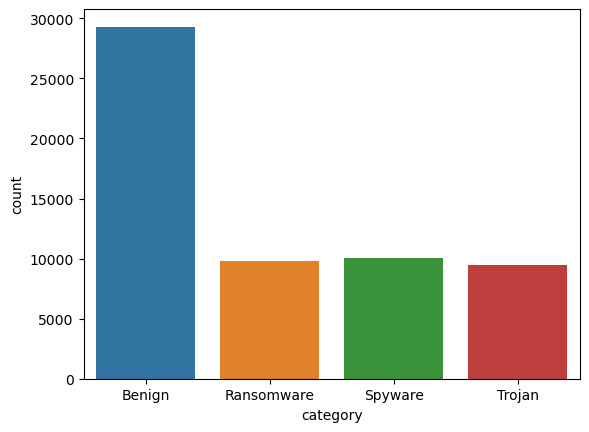

In [13]:
sns.countplot(x=df["category"])

<Axes: ylabel='category'>

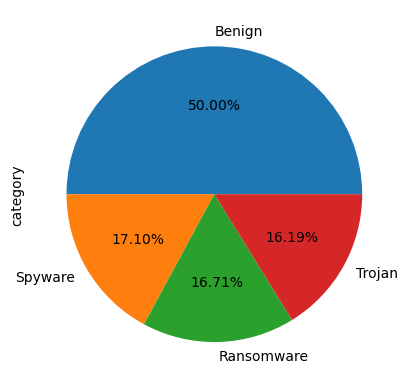

In [14]:
df["category"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [15]:
df["category_name"] = df["Category"].apply(find_category_name)

In [16]:
df["category_name"].value_counts()

Benign          29298
Transponder      2410
Gator            2200
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: category_name, dtype: int64

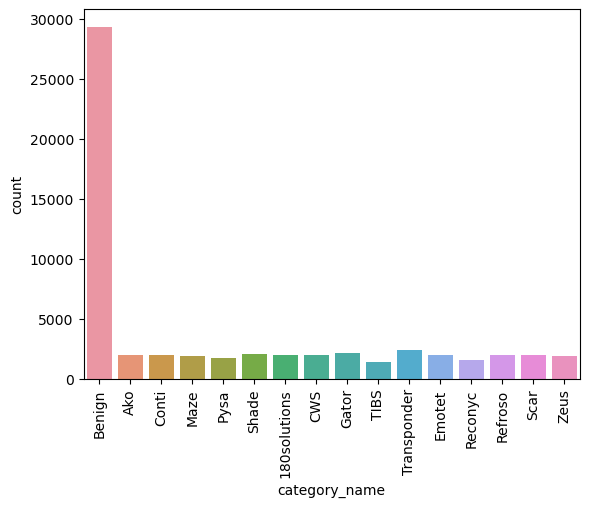

In [17]:
plt.figure()
sns.countplot(x=df["category_name"])
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='category_name'>

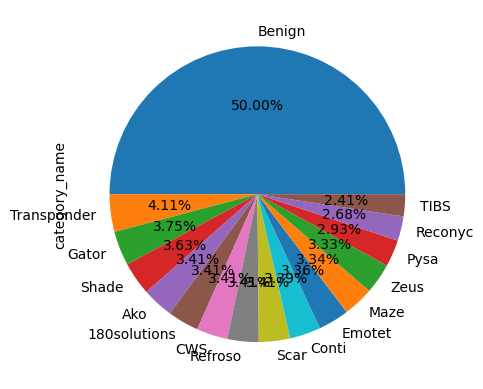

In [18]:
df["category_name"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [20]:
df["category"] = label_encoder(df["category"])
df["category_name"] = label_encoder(df["category_name"])
df["class"] = label_encoder(df["Class"])

category ['Benign' 'Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'Benign' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze'
 'Pysa' 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Benign' 'Malware']


In [21]:
df.drop(["Category", "Class"], axis=1, inplace=True)

In [22]:
df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name,class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,0,2,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,0,2,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,0,2,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,0,2,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,0,2,0


In [23]:
X = df.drop("class", axis=1)
y = df["class"]

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [28]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [29]:
clfs = [
    ("Logistic Regression", logreg),
    ("K-Nearest Neighbors", knn),
    ("Support Vector", svc),
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Extreme Gradient Boosting", xgb)
]

In [30]:
scores_df_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
scores_df = pd.DataFrame(columns=scores_df_cols)

In [31]:
for clf_name, clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_df = scores_df.append({
        "Model Name": clf_name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision Score": precision_score(y_test, y_pred),
        "Recall Score": recall_score(y_test, y_pred)
    }, ignore_index=True)

/tmp/ipykernel_20/2466548902.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/tmp/ipykernel_20/2466548902.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/tmp/ipykernel_20/2466548902.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/tmp/ipykernel_20/2466548902.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/tmp/ipykernel_20/2466548902.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.appe

In [32]:
scores_df

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.999886,0.999887,1.0,0.999773
1,K-Nearest Neighbors,0.999886,0.999887,1.0,0.999773
2,Support Vector,1.000000,1.000000,1.0,1.000000
3,Decision Tree,1.000000,1.000000,1.0,1.000000
4,Random Forest,1.000000,1.000000,1.0,1.000000
5,Extreme Gradient Boosting,1.000000,1.000000,1.0,1.000000


In [33]:
model_names = scores_df["Model Name"].values
accuracy_scores = scores_df["Accuracy Score"].values
f1_scores = scores_df["F1 Score"].values
precision_scores = scores_df["Precision Score"].values
recall_scores = scores_df["Recall Score"].values

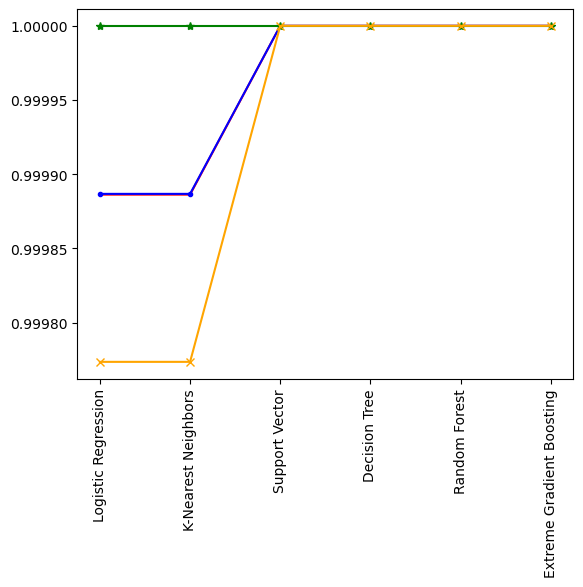

In [34]:
plt.figure()
plt.plot(model_names, accuracy_scores, color="red", marker=",")
plt.plot(model_names, f1_scores, color="blue", marker=".")
plt.plot(model_names, precision_scores, color="green", marker="*")
plt.plot(model_names, recall_scores, color="orange", marker="x")
plt.xticks(rotation=90)
plt.show()